In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [51]:
# Load the cleaned dataset
import pandas as pd
dataset_path = r"C:\Users\munag\OneDrive\Desktop\Mentor Together\M2G Dataset\Cleaned_Dataset.xlsx"
df = pd.read_excel(dataset_path)

In [52]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [53]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

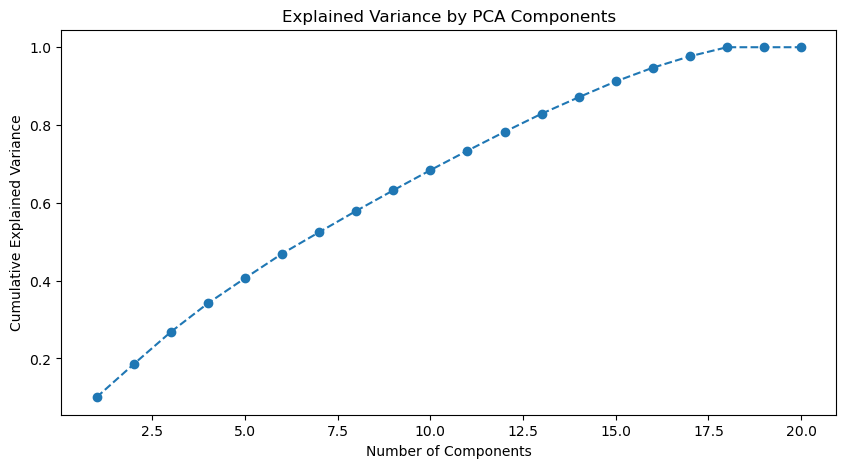

In [54]:
# Explained variance ratio plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

In [55]:
# Determine the optimal number of components (e.g., 95% variance)
import numpy as np
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

Optimal number of components: 17


In [56]:
# Apply PCA with optimal components

from sklearn.decomposition import PCA
pca_optimal = PCA(n_components=optimal_components)
pca_transformed = pca_optimal.fit_transform(df_scaled)

In [57]:
# Convert PCA result into a DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.109387  0.290150 -0.433920 -0.147641 -0.294535  0.027377 -1.119318   
1  0.935162  0.209696 -0.933765 -0.875539 -0.290727  0.306120 -0.768545   
2  1.451481 -1.193380 -0.644374  0.164107 -0.253528  0.330804  0.758047   
3  1.108287  0.290597 -0.434955 -0.146166 -0.293385  0.027215 -1.113880   
4  1.463827 -0.448688 -0.926499 -0.621680  0.573725  0.146427 -0.670252   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.243611  0.656442  0.556461  0.129551 -0.722483  0.976602 -0.139553   
1 -0.256426  0.699413  0.360806  0.175677 -0.160837  1.042390 -0.846180   
2 -1.691974  1.936907  1.326209  0.336031  0.397381  0.541010 -0.023688   
3 -0.240047  0.653285  0.553408  0.127467 -0.720658  0.971279 -0.138074   
4 -0.619966  0.634605  0.965699 -0.482621 -0.683608  0.519895 -1.145026   

       PC15      PC16      PC17  
0  1.081990 -0.200565 -0.367152  
1  0.721985  0.625136 -0.15366

In [ ]:
 Random Forest for predicting whether a person buys a policy.

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [60]:
# Load the cleaned dataset
import pandas as pd
dataset_path =  r"C:\Users\munag\OneDrive\Desktop\Mentor Together\M2G Dataset\Cleaned_Dataset.xlsx"
df = pd.read_excel(dataset_path)

In [61]:
# Assuming the target column is named 'Buys_Policy' (modify if needed)
target_column = 'outcome'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

In [62]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

In [64]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [65]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:

# Make predictions
y_pred = rf_model.predict(X_test)

In [67]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9350
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.49      0.48       200
weighted avg       0.89      0.94      0.91       200



In [ ]:
Random Forest model is now tuned using GridSearchCV!

In [68]:
# Load the cleaned dataset
import pandas as pd
dataset_path = r"C:\Users\munag\OneDrive\Desktop\Mentor Together\M2G Dataset\Cleaned_Dataset.xlsx"
df = pd.read_excel(dataset_path)

In [69]:
# Assuming the target column is named 'Buys_Policy' (modify if needed)
target_column = 'outcome'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

In [70]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

In [72]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [73]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [74]:
# Best model after tuning
best_rf_model = grid_search.best_estimator_

In [75]:
# Make predictions
y_pred = best_rf_model.predict(X_test)

In [76]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Tuned Model Accuracy: 0.9350
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       189
           1       0.00      0.00      0.00        11

    accuracy                           0.94       200
   macro avg       0.47      0.49      0.48       200
weighted avg       0.89      0.94      0.91       200



In [77]:

# Display best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


In [78]:
import joblib 
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [79]:
joblib.dump(model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [82]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train your model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the fitted model
joblib.dump(model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [83]:
model = joblib.load("random_forest_model.pkl")
predictions = model.predict(X_test)


In [85]:
import pandas as pd

# Correct function for Excel file
test_df = pd.read_excel(r"C:\Users\munag\OneDrive\Desktop\Mentor Together\M2G Dataset\Test Set for Project - 200 Records 75 Attributes.xlsx")


In [86]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report

# Load and clean test data
test_df = pd.read_excel(r"C:\Users\munag\OneDrive\Desktop\Mentor Together\M2G Dataset\Test Set for Project - 200 Records 75 Attributes.xlsx")
test_df.columns = test_df.columns.str.strip()  # Remove trailing spaces
if 'Record Serial Number' in test_df.columns:
    test_df = test_df.drop('Record Serial Number', axis=1)

# Prepare features and labels
feature_columns = test_df.columns.tolist()
feature_columns.remove('OUTCOME')
X_test = test_df[feature_columns]
y_test = test_df['OUTCOME']






In [87]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming you have training data X_train, y_train
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # Train the model

# Save the trained model to file
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [88]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming you have training data X_train, y_train
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # Train the model

# Save the trained model to file
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
Testing the model

In [89]:
import joblib
import pandas as pd

# Load your cleaned test data
X_test = pd.read_csv(r"C:\Users\munag\Downloads\test_dataset_cleaned.csv");

In [90]:
# Load the trained model
model = joblib.load("random_forest_model.pkl")

In [91]:
print(X_test.columns)
print(X_test.shape)


Index(['record serial number', 'maanthui(number of houses )',
       'mgemomv (average household size)', 'mgemleef2', 'mgemleef3',
       'mgemleef4', 'mgemleef5', 'minkgem', 'awapart', 'awabedr', 'awaland',
       'apersaut', 'abesaut', 'amotsco', 'avraaut', 'aaanhang', 'atractor',
       'awerkt', 'abrom'],
      dtype='object')
(201, 19)


In [92]:
print(X_test.columns.tolist())


['record serial number', 'maanthui(number of houses )', 'mgemomv (average household size)', 'mgemleef2', 'mgemleef3', 'mgemleef4', 'mgemleef5', 'minkgem', 'awapart', 'awabedr', 'awaland', 'apersaut', 'abesaut', 'amotsco', 'avraaut', 'aaanhang', 'atractor', 'awerkt', 'abrom']


In [121]:
import pandas as pd
import joblib

# Step 1: Load the cleaned test dataset
X_test = pd.read_excel("C:/Users/munag/OneDrive/Desktop/Mentor Together/test_dataset_cleaned.xlsx")



In [122]:
# Step 2: Define the 18 feature columns used during training
selected_features = [
    'maanthui(number of houses )', 'mgemomv (average household size)',
    'mgemleef2', 'mgemleef3', 'mgemleef4', 'mgemleef5',
    'minkgem', 'awaland', 'awapart', 'awabedr',
    'apersaut', 'abesaut', 'amotsco', 'avraaut',
    'aaanhang', 'atractor','awerkt', 'abrom'
]

In [123]:
# Step 3: Select only the training features
X_test = X_test[selected_features]


In [124]:

# Step 4: Load your trained model
model = joblib.load("random_forest_model.pkl")

In [ ]:
# Step 5: Predict on the test set
predictions = model.predict(X_test)

In [ ]:
# Step 6: Save the predictions to a CSV file
output = pd.DataFrame({"Prediction": predictions})
output.to_csv("test_predictions.csv", index=False)

In [114]:

print("✅ Predictions saved to test_predictions.csv")

✅ Predictions saved to test_predictions.csv


In [ ]:
output.to_csv('test_predictions.csv', index=False)


In [116]:
import os
print(os.getcwd())


C:\Users\munag


In [ ]:
y_pred = model.predict(X_test)


In [118]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9502487562189055
